In [1]:
import pandas as pd
import json
from tqdm import tqdm
from collections import Counter

### Building 10k vocab 
10k vocab of the most frequent tokens in the {`flickr8k, flickr30k, coco`}

In [2]:
files = ['data.json', 'data30.json', 'coco.json']

freqs = {}

tokens_list = []
for file in tqdm(files, desc='Getting Token Lists'):
    df = pd.read_json(file)
    tokens_list.extend(df.tokens.to_list()) 


for tokens in tqdm(tokens_list, desc='Counting Frequencies'):
    for word in tokens:
        if word not in freqs:
            freqs[word] = 1
        else:
            freqs[word] += 1

Counting Frequencies: 100%|██████████| 811837/811837 [00:02<00:00, 377327.70it/s]


In [3]:
top_vocab_dict = dict(sorted(freqs.items(), key=lambda x: x[1], reverse=True))

In [4]:
top_vocab_dict['the']

285794

In [5]:
topk_words = list(top_vocab_dict)[:10000]

In [6]:
topk_words[:10]

['a', 'in', 'the', 'on', 'of', 'with', 'and', 'is', 'man', 'to']

In [9]:
import pickle

with open("10k_words.txt", "wb") as f:
    pickle.dump(topk_words, f)

In [1]:
#testing 
from dataset import top10k_vocab
import pickle

In [4]:
with open("10k_words.txt", "rb") as f:
    topk_words = pickle.load(f)

vocab = top10k_vocab(topk_words)

100%|██████████| 1/1 [00:00<00:00, 134.08it/s]


In [6]:
vocab.itos

{0: '<pad>',
 1: '<sos>',
 2: '<eos>',
 3: '<unk>',
 4: 'a',
 5: 'in',
 6: 'the',
 7: 'on',
 8: 'of',
 9: 'with',
 10: 'and',
 11: 'is',
 12: 'man',
 13: 'to',
 14: 'two',
 15: 'an',
 16: 'are',
 17: 'sitting',
 18: 'people',
 19: 'at',
 20: 'woman',
 21: 'standing',
 22: 'white',
 23: 'next',
 24: 'street',
 25: 'holding',
 26: 'black',
 27: 'dog',
 28: 'table',
 29: 'his',
 30: 'down',
 31: 'young',
 32: 'that',
 33: 'large',
 34: 'group',
 35: 'person',
 36: 'red',
 37: 'some',
 38: 'front',
 39: 'up',
 40: 'wearing',
 41: 'while',
 42: 'it',
 43: 'blue',
 44: 'top',
 45: 'field',
 46: 'small',
 47: 'playing',
 48: 'water',
 49: 'by',
 50: 'near',
 51: 'boy',
 52: 'walking',
 53: 'riding',
 54: 'girl',
 55: 'tennis',
 56: 'shirt',
 57: 'men',
 58: 'train',
 59: 'room',
 60: 'green',
 61: 'plate',
 62: 'her',
 63: 'has',
 64: 'three',
 65: 'looking',
 66: 'cat',
 67: 'baseball',
 68: 'grass',
 69: 'ball',
 70: 'other',
 71: 'for',
 72: 'building',
 73: 'one',
 74: 'snow',
 75: 'sign'

In [7]:
len(vocab)

10004

In [1]:
import pandas as pd
import json
from tqdm import tqdm
from collections import Counter

In [2]:
file_path = 'dataset_coco.json'
with open(file_path, 'r') as f:
    data = json.load(f)

In [3]:
file_names = []
splits = []
captions = []
tokens = []
tok_len = []
word_freq = Counter()
max_len = 100

for img in tqdm(data['images'], position=0):
    for sent in img['sentences']:
        file_names.append(img['filename'])
        captions.append(sent['raw'])
        splits.append(img['split'])
        
        ## tokens
        if len(sent['tokens']) <= max_len:
            tokens.append(sent['tokens'])
            tok_len.append(len(sent['tokens']))

100%|██████████| 123287/123287 [00:00<00:00, 244317.75it/s]


In [4]:
len(tok_len)


616767

In [5]:
df = pd.DataFrame({
    'file_name': file_names,
    'split': splits,
    'caption': captions,
    'tok_len': tok_len,
    'tokens': tokens
})

<AxesSubplot:>

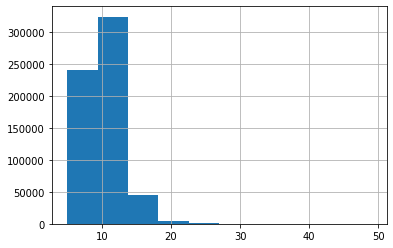

In [6]:
df.tok_len.hist()

In [7]:
df.tok_len.max(), df.tok_len.min() 

(49, 5)

In [8]:
df.to_json("coco.json")

In [38]:
df = pd.read_json("data30.json")
df.head(10)

,file_name,split,caption,tok_len,tokens
0,1000092795.jpg,train,Two young guys with shaggy hair look at their ...,16,"[two, young, guys, with, shaggy, hair, look, a..."
1,1000092795.jpg,train,"Two young, White males are outside near many b...",9,"[two, young, white, males, are, outside, near,..."
2,1000092795.jpg,train,Two men in green shirts are standing in a yard.,10,"[two, men, in, green, shirts, are, standing, i..."
3,1000092795.jpg,train,A man in a blue shirt standing in a garden.,10,"[a, man, in, a, blue, shirt, standing, in, a, ..."
4,1000092795.jpg,train,Two friends enjoy time spent together.,6,"[two, friends, enjoy, time, spent, together]"
5,10002456.jpg,train,Several men in hard hats are operating a giant...,11,"[several, men, in, hard, hats, are, operating,..."
6,10002456.jpg,train,Workers look down from up above on a piece of ...,11,"[workers, look, down, from, up, above, on, a, ..."
7,10002456.jpg,train,Two men working on a machine wearing hard hats.,9,"[two, men, working, on, a, machine, wearing, h..."
8,10002456.jpg,train,Four men on top of a tall structure.,8,"[four, men, on, top, of, a, tall, structure]"
9,10002456.jpg,train,Three men on a large rig.,6,"[three, men, on, a, large, rig]"


# Arabic Preprocessing 

In [1]:
import pandas as pd
import spacy
import pyarabic.araby as araby

from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [106]:
# getting the arabic data
ar_df = pd.read_csv('others/ar_captions_full.txt', sep='\t', names=['file_name', 'caption'])
ar_df.head()

,file_name,caption
0,1000268201_693b08cb0e.jpg#0,طفلة صغيرة تتسلق إلى مسرح خشبي
1,1000268201_693b08cb0e.jpg#1,طفلة صغيرة تتسلق الدرج إلى منزلها
2,1000268201_693b08cb0e.jpg#2,فتاة صغيرة في ثوب وردي تذهب إلى المقصورة الخشبية
3,1001773457_577c3a7d70.jpg#0,كلب أسود وكلب ثلاثي الألوان يلعبان مع بعضهما ا...
4,1001773457_577c3a7d70.jpg#1,كلب أسود وكلب أبيض ببقع بنية يحدقان في بعضهما ...


In [107]:
ar_df.file_name = ar_df.file_name.apply(lambda x: x.split("#")[0])
ar_df.head()

,file_name,caption
0,1000268201_693b08cb0e.jpg,طفلة صغيرة تتسلق إلى مسرح خشبي
1,1000268201_693b08cb0e.jpg,طفلة صغيرة تتسلق الدرج إلى منزلها
2,1000268201_693b08cb0e.jpg,فتاة صغيرة في ثوب وردي تذهب إلى المقصورة الخشبية
3,1001773457_577c3a7d70.jpg,كلب أسود وكلب ثلاثي الألوان يلعبان مع بعضهما ا...
4,1001773457_577c3a7d70.jpg,كلب أسود وكلب أبيض ببقع بنية يحدقان في بعضهما ...


In [108]:
ar_df['split'] = 'other'
ar_df.head()

,file_name,caption,split
0,1000268201_693b08cb0e.jpg,طفلة صغيرة تتسلق إلى مسرح خشبي,other
1,1000268201_693b08cb0e.jpg,طفلة صغيرة تتسلق الدرج إلى منزلها,other
2,1000268201_693b08cb0e.jpg,فتاة صغيرة في ثوب وردي تذهب إلى المقصورة الخشبية,other
3,1001773457_577c3a7d70.jpg,كلب أسود وكلب ثلاثي الألوان يلعبان مع بعضهما ا...,other
4,1001773457_577c3a7d70.jpg,كلب أسود وكلب أبيض ببقع بنية يحدقان في بعضهما ...,other


In [109]:

def split(x):
    
    if x in test_names:
        return 'test'
    elif x in val_names:
        return 'val'
    elif x in train_names:
        return 'train'
    else:
        print(x)

In [110]:
df = pd.read_json("data.json")
df.head()

,file_name,split,caption,tok_len,tokens
0,2513260012_03d33305cf.jpg,train,A black dog is running after a white dog in th...,12,"[a, black, dog, is, running, after, a, white, ..."
1,2513260012_03d33305cf.jpg,train,Black dog chasing brown dog through snow,7,"[black, dog, chasing, brown, dog, through, snow]"
2,2513260012_03d33305cf.jpg,train,Two dogs chase each other across the snowy gro...,9,"[two, dogs, chase, each, other, across, the, s..."
3,2513260012_03d33305cf.jpg,train,Two dogs play together in the snow .,7,"[two, dogs, play, together, in, the, snow]"
4,2513260012_03d33305cf.jpg,train,Two dogs running through a low lying body of w...,10,"[two, dogs, running, through, a, low, lying, b..."


In [111]:
test_names = df[df['split'] == 'test'].file_name.unique()
val_names = df[df['split'] == 'val'].file_name.unique()
train_names = df[df['split'] == 'train'].file_name.unique()
len(train_names), len(val_names), len(test_names)

(6000, 1000, 1000)

In [112]:
ar_df['split'] = ar_df['file_name'].apply(lambda row: split(row))
ar_df.sample(5)

1155138244_859fd6e079.jpg
1155138244_859fd6e079.jpg
1155138244_859fd6e079.jpg
1468103286_96a6e07029.jpg
1468103286_96a6e07029.jpg
1468103286_96a6e07029.jpg
1479857177_9d4a6f38fd.jpg
1479857177_9d4a6f38fd.jpg
1479857177_9d4a6f38fd.jpg
1643915227_9f48068772.jpg
1643915227_9f48068772.jpg
1643915227_9f48068772.jpg
1797554350_20998753c0.jpg
1797554350_20998753c0.jpg
1797554350_20998753c0.jpg
1808504612_3508f3c9bb.jpg
1808504612_3508f3c9bb.jpg
1808504612_3508f3c9bb.jpg
199463720_329a802206.jpg
199463720_329a802206.jpg
199463720_329a802206.jpg
2058091220_2087270068.jpg
2058091220_2087270068.jpg
2058091220_2087270068.jpg
2087317114_cf06df5aa5.jpg
2087317114_cf06df5aa5.jpg
2087317114_cf06df5aa5.jpg
2136455112_202c093ba4.jpg
2136455112_202c093ba4.jpg
2136455112_202c093ba4.jpg
2221818690_9003756d33.jpg
2221818690_9003756d33.jpg
2221818690_9003756d33.jpg
2319197581_94f807b204.jpg
2319197581_94f807b204.jpg
2319197581_94f807b204.jpg
236095031_5cb17dc54a.jpg
236095031_5cb17dc54a.jpg
236095031_5cb17dc

,file_name,caption,split
9643,2875583266_4da13ae12d.jpg,يميل سائق دراجة نارية في منحنى مع دراجته النارية,train
13017,3173976185_8a50123050.jpg,كلب أبيض وأسود يقف على العشب و فمه مفتوح على م...,train
2689,2064790732_219e52e19c.jpg,صبي صغير يرقص مع مجموعة من الناس وراءه في أحد ...,test
19497,3607405494_0df89110a6.jpg,ثلاثة كلاب يقفزون في الهواء وهم يتنافسون في سباق,train
9712,2881468095_d4ce8c0c52.jpg,المتزلج يقوم بعمل حيل على جدار حجري بجوار السلالم,train


In [113]:
ar_df.head()

,file_name,caption,split
0,1000268201_693b08cb0e.jpg,طفلة صغيرة تتسلق إلى مسرح خشبي,train
1,1000268201_693b08cb0e.jpg,طفلة صغيرة تتسلق الدرج إلى منزلها,train
2,1000268201_693b08cb0e.jpg,فتاة صغيرة في ثوب وردي تذهب إلى المقصورة الخشبية,train
3,1001773457_577c3a7d70.jpg,كلب أسود وكلب ثلاثي الألوان يلعبان مع بعضهما ا...,train
4,1001773457_577c3a7d70.jpg,كلب أسود وكلب أبيض ببقع بنية يحدقان في بعضهما ...,train


In [117]:
ar_df = ar_df[ar_df.split.isin(['train', 'val', 'test'])]
ar_df.head()

,file_name,caption,split
0,1000268201_693b08cb0e.jpg,طفلة صغيرة تتسلق إلى مسرح خشبي,train
1,1000268201_693b08cb0e.jpg,طفلة صغيرة تتسلق الدرج إلى منزلها,train
2,1000268201_693b08cb0e.jpg,فتاة صغيرة في ثوب وردي تذهب إلى المقصورة الخشبية,train
3,1001773457_577c3a7d70.jpg,كلب أسود وكلب ثلاثي الألوان يلعبان مع بعضهما ا...,train
4,1001773457_577c3a7d70.jpg,كلب أسود وكلب أبيض ببقع بنية يحدقان في بعضهما ...,train


In [118]:
ar_df.split.unique()

array(['train', 'val', 'test'], dtype=object)

In [119]:
ar_df.to_csv("ar_data.csv", index=None)

In [120]:
df = pd.read_csv("ar_data.csv", )

In [121]:
df[df.split=='train'].shape[0], df[df.split=='val'].shape[0], df[df.split=='test'].shape[0]

(18000, 3000, 3000)

In [122]:
df[df.split=='train'].file_name.nunique(), df[df.split=='val'].file_name.nunique(), df[df.split=='test'].file_name.nunique()

(6000, 1000, 1000)

In [123]:
df.head()

,file_name,caption,split
0,1000268201_693b08cb0e.jpg,طفلة صغيرة تتسلق إلى مسرح خشبي,train
1,1000268201_693b08cb0e.jpg,طفلة صغيرة تتسلق الدرج إلى منزلها,train
2,1000268201_693b08cb0e.jpg,فتاة صغيرة في ثوب وردي تذهب إلى المقصورة الخشبية,train
3,1001773457_577c3a7d70.jpg,كلب أسود وكلب ثلاثي الألوان يلعبان مع بعضهما ا...,train
4,1001773457_577c3a7d70.jpg,كلب أسود وكلب أبيض ببقع بنية يحدقان في بعضهما ...,train


In [124]:
df.split.unique()

array(['train', 'val', 'test'], dtype=object)

In [125]:
all_tokens = []
token_lens = []
for i in tqdm(range(df.shape[0])):
    try:
        tokens = araby.tokenize(df.iloc[i].caption)
    except:
        print(df.iloc[i].caption)
        break
    token_len = len(tokens)
    all_tokens.append(tokens)
    token_lens.append(token_len)

100%|██████████| 24000/24000 [00:02<00:00, 9753.35it/s] 


In [126]:
#file_name	split	caption	tok_len	tokens
df['tok_len'] = token_lens
df['tokens'] = all_tokens

In [127]:
df.head()

,file_name,caption,split,tok_len,tokens
0,1000268201_693b08cb0e.jpg,طفلة صغيرة تتسلق إلى مسرح خشبي,train,6,"[طفلة, صغيرة, تتسلق, إلى, مسرح, خشبي]"
1,1000268201_693b08cb0e.jpg,طفلة صغيرة تتسلق الدرج إلى منزلها,train,6,"[طفلة, صغيرة, تتسلق, الدرج, إلى, منزلها]"
2,1000268201_693b08cb0e.jpg,فتاة صغيرة في ثوب وردي تذهب إلى المقصورة الخشبية,train,9,"[فتاة, صغيرة, في, ثوب, وردي, تذهب, إلى, المقصو..."
3,1001773457_577c3a7d70.jpg,كلب أسود وكلب ثلاثي الألوان يلعبان مع بعضهما ا...,train,11,"[كلب, أسود, وكلب, ثلاثي, الألوان, يلعبان, مع, ..."
4,1001773457_577c3a7d70.jpg,كلب أسود وكلب أبيض ببقع بنية يحدقان في بعضهما ...,train,12,"[كلب, أسود, وكلب, أبيض, ببقع, بنية, يحدقان, في..."


In [128]:
df.tok_len.max(), df.tok_len.min()

(26, 1)

In [129]:
df.to_json("ar_data.json")

<AxesSubplot:>

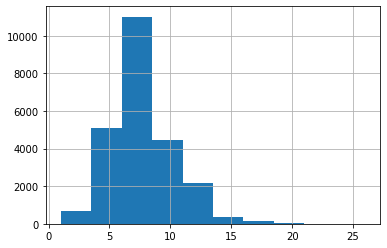

In [2]:
df = pd.read_json("ar_data.json")
df.tok_len.hist()